In [1]:
%gui wx
from IPython.display import Image
from tvtk.tools import ivtk
from graph import Axis

# create the viewer
viewer = ivtk.viewer()
viewer.size = (640, 480)

viewer.scene.camera.view_up = (0., 0., 1.)

display_number = 1
def display():
    global display_number
    path = 'img/ReemCIK/%s.png' % display_number
    display_number += 1
    viewer.scene.save(path)
    return Image(path)

In [2]:
import numpy as np
import eigen3 as e
import spacevecalg as sva
import rbdyn as rbd

from robots import ReemC

# create a robot with the same structure than the one in the MultiBody tutorial
mbg, mb, mbc, meshDict = ReemC()

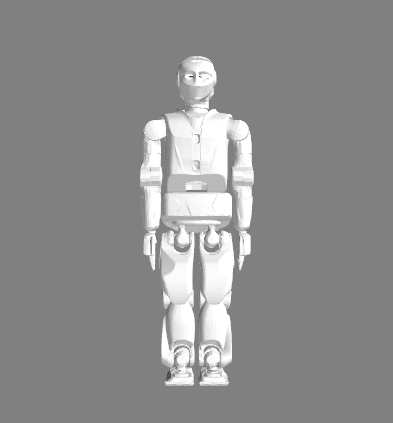

In [3]:
# draw the robot
from graph import MultiBodyViz

mbv = MultiBodyViz(mbg, mb, meshDict=meshDict)
mbv.addActors(viewer.scene)

rbd.forwardKinematics(mb, mbc)

bodyPosW = list(mbc.bodyPosW)

viewer.scene.camera.focal_point = tuple(bodyPosW[0].translation())
viewer.scene.camera.position = tuple(bodyPosW[0].translation() + e.Vector3d.UnitX()*4)

mbv.display(mb, mbc, displayJoints=False)
display()